# **Project Cancer Detection**
Breast Cancer Wisconsin (Diagnostic) Data Set

source : [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))



In [98]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [99]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

--2020-08-17 12:06:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data.1’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.1s    

2020-08-17 12:06:05 (150 KB/s) - ‘breast-cancer-wisconsin.data.1’ saved [19889/19889]



In [100]:
!ls

breast-cancer-wisconsin.data  breast-cancer-wisconsin.data.1  sample_data


In [101]:
column = ['id','Clump Thickness' , 'Uniformity of Cell Size', 'Uniformity of Cell Shape',  
   'Marginal Adhesion ', 'Single Epithelial Cell Size', 'Bare Nuclei'  , 'Bland Chromatin' , 'Normal Nucleoli' ,'Mitoses',
          'Class' ]

In [102]:
df = pd.read_csv("breast-cancer-wisconsin.data",names=column,header = None)
df

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## **Data Preprocessing:**

In [103]:
df.isnull().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

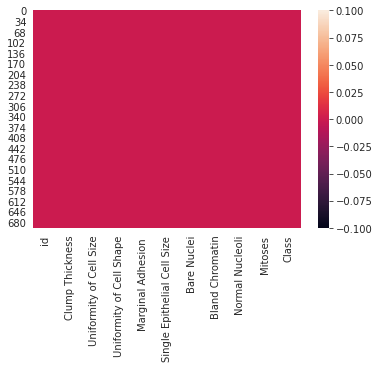

In [104]:
sns.heatmap(df.isnull())

In [105]:
df['Class'].unique()

array([2, 4])

In [106]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [107]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [108]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

#### drop **?**

In [109]:
df[df['Bare Nuclei'] == '?']

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [110]:
df['Bare Nuclei'].replace('?',np.NaN,inplace = True)

In [111]:
df = df.dropna()

In [112]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [113]:
df.shape

(683, 11)

In [114]:
# make class 2,4 to 0,1

df['Class'] = (df['Class'] / 2 )- 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
df['Class'].unique()

array([0., 1.])

In [116]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [117]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion ',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    object 
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


In [119]:
x = df.drop(['id','Class'],axis = 1)
x_col = x.columns
x

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [120]:
y = df['Class']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
694    0.0
695    0.0
696    1.0
697    1.0
698    1.0
Name: Class, Length: 683, dtype: float64

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [123]:
from  sklearn.model_selection import train_test_split

In [124]:
df1 = pd.DataFrame(x,columns = x_col)
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [125]:
x_train, x_test, y_train, y_test = train_test_split(df1,y,test_size = 0.2,
                                                    random_state =42)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors=5,p = 2, metric='minkowski')

In [128]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

def print_score(model,x_train,y_train,x_test,y_test,part):
  lb = LabelBinarizer()
  lb.fit(y_train)
  if part == 'train':
    y_pred = model.predict(x_train)
    print("Training Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_train,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_train,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_train,y_pred)))
    
  elif part == 'test':
    y_pred = model.predict(x_test)
    print("Testing Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_test,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_test,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_test,y_pred)))
    

In [130]:
print_score(knn,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(knn,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9725

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix:
[[358   7]
 [  8 173]]

ROC_AUC_Score:0.9683


***************************************************************

Testing Performance:


Accuracy:0.9562

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
[[78  1]
 [ 5 53]]

ROC_AUC_Score:0.9506



## **Grid Search:**

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [133]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [134]:
grid = GridSearchCV(KNeighborsClassifier(),params,n_jobs = -1, verbose = 1, cv = 10)

In [135]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [136]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [137]:
grid.best_score_

0.9670707070707071

In [138]:
grid.best_params_

{'n_neighbors': 7}

In [139]:
print_score(grid,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(grid,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9725

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix:
[[358   7]
 [  8 173]]

ROC_AUC_Score:0.9683


***************************************************************

Testing Performance:


Accuracy:0.9562

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
[[78  1]
 [ 5 53]]

ROC_AUC_Score:0.9506



In [140]:
grid.cv_results_['mean_test_score'] # at each neighbor

array([0.94690236, 0.94323232, 0.96154882, 0.96521886, 0.96343434,
       0.96521886, 0.96707071, 0.96521886, 0.96521886, 0.96703704])

## **Comparison with other models:**[SVM,DecisionTree, RandomForest, XGBoost]

In [141]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf',gamma = 'scale')
clf.fit(x_train,y_train)
print_score(clf,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9799

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       365
         1.0       0.96      0.98      0.97       181

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546


Confusion Matrix:
[[358   7]
 [  4 177]]

ROC_AUC_Score:0.9794


***************************************************************

Testing Performance:


Accuracy:0.9635

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        79
         1.0       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
[[77  2]
 [ 3 55]]

ROC_AUC_Score:0.9615



In [142]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42)
clf.fit(x_train,y_train)
print_score(clf,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix:
[[365   0]
 [  0 181]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.9343

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        79
         1.0       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137


Confusion Matrix:
[[77  2]
 [ 7 51]]

ROC_AUC_Score:0.9270



In [143]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(random_state = 42, n_estimators = 100)
clf.fit(x_train,y_train)
print_score(clf,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix:
[[365   0]
 [  0 181]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.9489

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix:
[[78  1]
 [ 6 52]]

ROC_AUC_Score:0.9419



In [144]:
import xgboost
clf = xgboost.XGBClassifier(n_estimators = 100)
clf.fit(x_train,y_train)
print_score(clf,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9927

Clasification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       365
         1.0       0.98      0.99      0.99       181

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546


Confusion Matrix:
[[362   3]
 [  1 180]]

ROC_AUC_Score:0.9931


***************************************************************

Testing Performance:


Accuracy:0.9489

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix:
[[78  1]
 [ 6 52]]

ROC_AUC_Score:0.9419

